In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the DFT Dataset
pbe_data = pd.read_csv("Data/PBE_Data.csv")
pbe_data

,Formula,Decomp,Gap,SLME,Phase,K,Rb,Cs,MA,FA,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,CsBa_0.125Ge_0.875I_3,0.108798,1.0359,22.719,1,0.0,0.0,1.0,0.0,0.0,...,387,4.93,127.0,295,1010,7.76,20.9,2.66,53.0,5.00
1,CsBa_0.125Pb_0.875I_3,0.123919,1.7481,16.874,1,0.0,0.0,1.0,0.0,0.0,...,387,4.93,127.0,295,1010,7.76,20.9,2.66,53.0,5.00
2,CsBa_0.25Pb_0.75I_3,0.153314,1.9674,14.218,1,0.0,0.0,1.0,0.0,0.0,...,387,4.93,127.0,295,1010,7.76,20.9,2.66,53.0,5.00
3,CsBa_0.375Pb_0.625I_3,0.175914,2.2825,9.603,1,0.0,0.0,1.0,0.0,0.0,...,387,4.93,127.0,295,1010,7.76,20.9,2.66,53.0,5.00
4,CsBa_0.5Pb_0.5I_3,0.204620,2.2945,7.575,1,0.0,0.0,1.0,0.0,0.0,...,387,4.93,127.0,295,1010,7.76,20.9,2.66,53.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,RbSrBr_1.5Cl_1.5,0.177850,4.0898,0.000,1,0.0,1.0,0.0,0.0,0.0,...,219,3.17,57.7,337,1200,4.25,12.5,3.06,26.0,3.50
566,RbSrBr_3,0.192420,3.8789,0.010,1,0.0,1.0,0.0,0.0,0.0,...,266,3.12,79.9,325,1140,5.29,14.7,2.96,35.0,4.00
567,RbSrCl_3,0.171397,4.6052,0.000,1,0.0,1.0,0.0,0.0,0.0,...,172,3.21,35.5,349,1250,3.21,10.2,3.16,17.0,3.00
568,RbSrI_2.625Br_0.375,0.250051,3.2687,0.317,1,0.0,1.0,0.0,0.0,0.0,...,372,4.70,121.0,299,1020,7.45,20.1,2.70,50.8,4.88


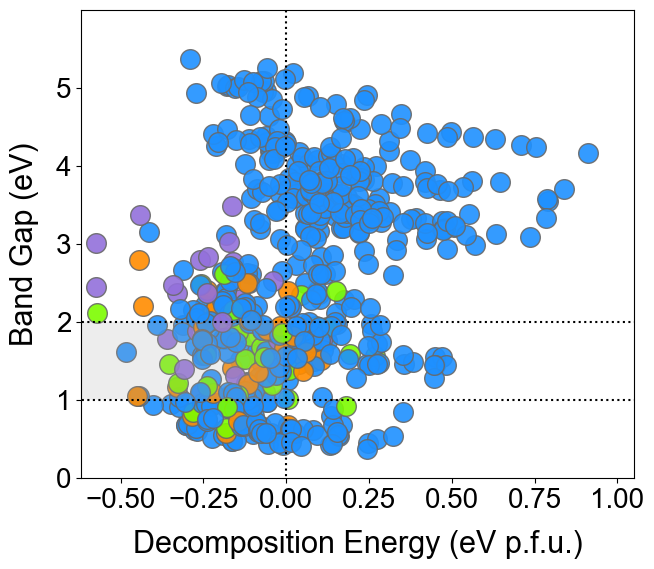

In [3]:
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
for i in range(len(pbe_data)):
    if pbe_data.Phase[i] == 1:
        plt.scatter(pbe_data.Decomp[i], pbe_data.Gap[i], c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)
    if pbe_data.Phase[i] == 2:
        plt.scatter(pbe_data.Decomp[i], pbe_data.Gap[i], c='lawngreen', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)
    if pbe_data.Phase[i] == 3:
        plt.scatter(pbe_data.Decomp[i], pbe_data.Gap[i], c='darkorange', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)
    if pbe_data.Phase[i] == 4:
        plt.scatter(pbe_data.Decomp[i], pbe_data.Gap[i], c='mediumpurple', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=100, edgecolors='dodgerblue', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=100, edgecolors='lawngreen', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=100, edgecolors='darkorange', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=100, edgecolors='mediumpurple', alpha=0.9, label='Hex')

a = [1,1,1]
b = [-1000,0,1000]
c = [0,0,0]
d = [2,2,2]
plt.plot(b, a, c='k', ls=':')
plt.plot(b, d, c='k', ls=':')
plt.plot(c, b, c='k', ls=':')
x1 = np.arange(-1000, c[0],  0.01)

plt.fill_between(x1, a[0], d[0], facecolor='darkgrey', alpha=0.2)

plt.xlim([-0.62, 1.05])
plt.ylim([0, 6])
plt.xticks([-0.5, -0.25, 0, 0.25, 0.50, 0.75, 1], fontsize=20, fontname = "Arial")
plt.yticks([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], fontsize=20, fontname = "Arial")
plt.xlabel('Decomposition Energy (eV p.f.u.)', fontsize=22, labelpad=12, fontname = "Arial")
plt.ylabel('Band Gap (eV)', fontsize=22, labelpad=12, fontname = "Arial")
plt.show()

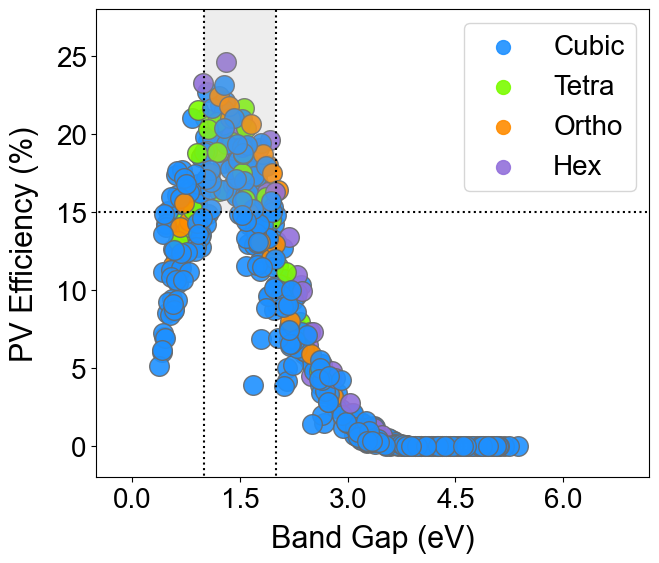

In [4]:
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
for i in range(len(pbe_data)):
    if pbe_data.Phase[i] == 1:
        plt.scatter(pbe_data.Gap[i], pbe_data.SLME[i], c='dodgerblue', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)
    if pbe_data.Phase[i] == 2:
        plt.scatter(pbe_data.Gap[i], pbe_data.SLME[i], c='lawngreen', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)
    if pbe_data.Phase[i] == 3:
        plt.scatter(pbe_data.Gap[i], pbe_data.SLME[i], c='darkorange', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)
    if pbe_data.Phase[i] == 4:
        plt.scatter(pbe_data.Gap[i], pbe_data.SLME[i], c='mediumpurple', marker='o', s=200, edgecolors='dimgrey', alpha=0.9)

plt.scatter(1000, 1000, c='dodgerblue', marker='o', s=100, edgecolors='dodgerblue', alpha=0.9, label='Cubic')
plt.scatter(1000, 1000, c='lawngreen', marker='o', s=100, edgecolors='lawngreen', alpha=0.9, label='Tetra')
plt.scatter(1000, 1000, c='darkorange', marker='o', s=100, edgecolors='darkorange', alpha=0.9, label='Ortho')
plt.scatter(1000, 1000, c='mediumpurple', marker='o', s=100, edgecolors='mediumpurple', alpha=0.9, label='Hex')

a = [1,1,1]
b = [-1000,0,1000]
d = [2,2,2]
c = [15,15,15]
plt.plot(a, b, c='k', ls=':')
plt.plot(d, b, c='k', ls=':')
plt.plot(b, c, c='k', ls=':')
x1 = np.arange(a[0], d[0],  0.01)

plt.fill_between(x1, c[0], 1000, facecolor='darkgrey', alpha=0.2)

plt.ylim([-2, 28])
plt.xlim([-0.5, 7.2])
plt.yticks([0, 5, 10, 15, 20, 25], fontsize=20, fontname = "Arial")
plt.xticks([0.0, 1.5, 3.0, 4.5, 6.0], fontsize=20, fontname = "Arial")
plt.ylabel('PV Efficiency (%)', fontsize=22, labelpad=12, fontname = "Arial")
plt.xlabel('Band Gap (eV)', fontsize=22, labelpad=8, fontname = "Arial")
plt.legend(loc='upper right', ncol=1, frameon=True, prop={'size':20, 'family':'Arial'})
plt.show()

Single Fidelity RFR Models - Category 1

Test/Train RMSE for Decomp: 0.070966472975326 0.028238665625603846


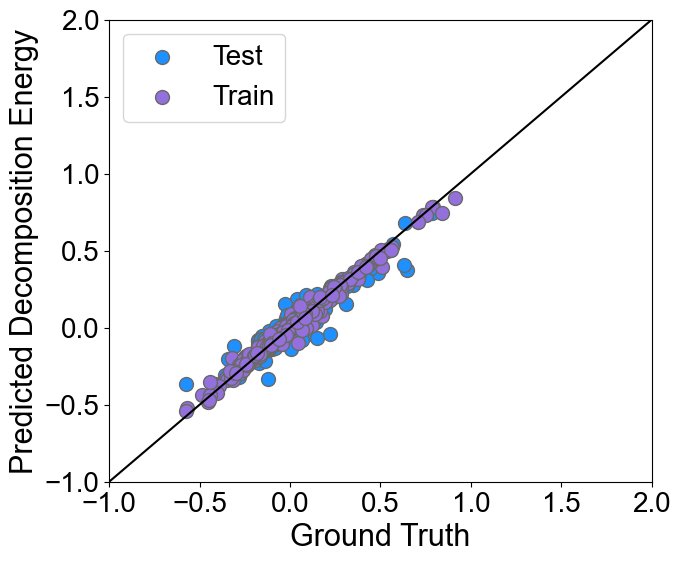

In [16]:
# Training Random Forest Regression Model for predicting Decomposition Energy
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
label = ['Decomp']
X = pbe_data[features]
y = pbe_data[label]

X_true_train, X_true_test, y_true_train_decomp, y_true_test_decomp = train_test_split(X, y, test_size=0.30, random_state=42)

param_grid = {}

rfr_decomp = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfr_decomp.fit(X_true_train, y_true_train_decomp)
Pred_train = rfr_decomp.predict(X_true_train)
Pred_test = rfr_decomp.predict(X_true_test)

Pred_decomp_train = np.array(Pred_train, dtype="float32")
Pred_decomp_test = np.array(Pred_test, dtype="float32")

rmse_test_decomp = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test_decomp, Pred_decomp_test) )
rmse_train_decomp = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train_decomp, Pred_decomp_train) )

print("Test/Train RMSE for Decomp:", rmse_test_decomp, rmse_train_decomp)
fig = plt.figure( figsize=(7,6) )
plt.scatter(y_true_test_decomp, Pred_decomp_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
plt.scatter(y_true_train_decomp, Pred_decomp_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
plt.plot( [-2,4],[-2,4], c="black")
plt.ylabel("Predicted Decomposition Energy", fontsize=22, fontname = "Arial")
plt.xlabel("Ground Truth", fontsize=22, fontname = "Arial")
plt.yticks(fontsize=20, fontname = "Arial")
plt.xticks(fontsize=20, fontname = "Arial")
plt.xlim([-1, 2])
plt.ylim([-1, 2])
plt.legend(["Test", "Train"], prop={'size':20, 'family':'Arial'})
plt.show()

Test/Train RMSE for Band Gap: 0.22923060060233613 0.09903842020248205


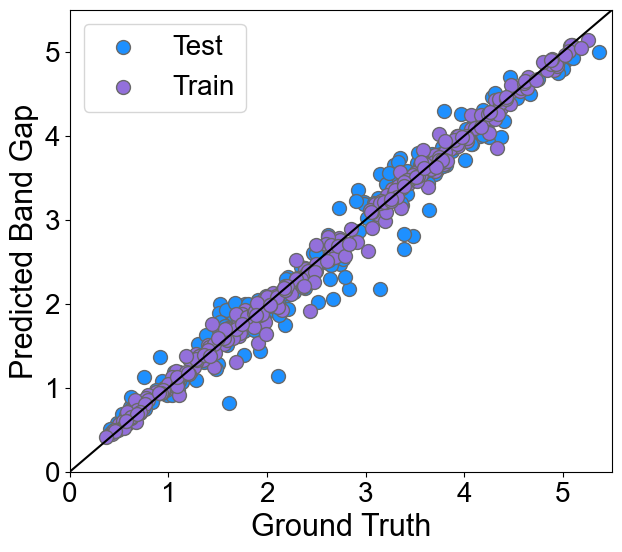

In [18]:
# Training Random Forest Regression Model for predicting Band Gap
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
label = ['Gap']
X = pbe_data[features]
y = pbe_data[label]

X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)

param_grid = {}

rfr_gap = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfr_gap.fit(X_true_train, y_true_train)
Pred_train = rfr_gap.predict(X_true_train)
Pred_test = rfr_gap.predict(X_true_test)

Pred_gap_train = np.array(Pred_train, dtype="float32")
Pred_gap_test = np.array(Pred_test, dtype="float32")

rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test, Pred_gap_test) )
rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train, Pred_gap_train) )

print("Test/Train RMSE for Band Gap:", rmse_test_gap, rmse_train_gap)
fig = plt.figure( figsize=(7,6) )
plt.ylabel("Predicted Band Gap", fontsize=22, fontname = "Arial")
plt.xlabel("Ground Truth", fontsize=22, fontname = "Arial")
plt.yticks(fontsize=20, fontname = "Arial")
plt.xticks(fontsize=20, fontname = "Arial")
plt.scatter(y_true_test, Pred_gap_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
plt.scatter(y_true_train, Pred_gap_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
plt.plot( [0,5.5],[0,5.5], c="black")
plt.legend(["Test", "Train"], prop={'size':20, 'family':'Arial'})
plt.xlim([0, 5.5])
plt.ylim([0, 5.5])
plt.show()

Test/Train RMSE for SLME: 2.3858826949545637 1.0170980561154443


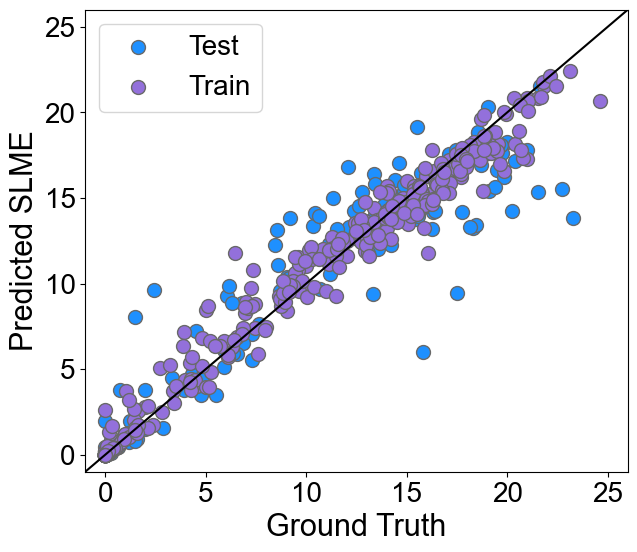

In [20]:
# Training Random Forest Regression Model for predicting SLME
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
label = ['SLME']
X = pbe_data[features]
y = pbe_data[label]

X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)

param_grid = {}

rfr_slme = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfr_slme.fit(X_true_train, y_true_train)
Pred_train = rfr_slme.predict(X_true_train)
Pred_test = rfr_slme.predict(X_true_test)

Pred_slme_train = np.array(Pred_train, dtype="float32")
Pred_slme_test = np.array(Pred_test, dtype="float32")

rmse_test_slme = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test, Pred_slme_test) )
rmse_train_slme = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train, Pred_slme_train) )

print("Test/Train RMSE for SLME:", rmse_test_slme, rmse_train_slme)
fig = plt.figure( figsize=(7,6) )
plt.scatter(y_true_test, Pred_slme_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
plt.scatter(y_true_train, Pred_slme_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
plt.plot( [-1, 26],[-1,26], c="black")
plt.ylabel("Predicted SLME", fontsize=22, fontname = "Arial")
plt.xlabel("Ground Truth", fontsize=22, fontname = "Arial")
plt.yticks(fontsize=20, fontname = "Arial")
plt.xticks(fontsize=20, fontname = "Arial")
plt.xlim([-1, 26])
plt.ylim([-1, 26])
plt.legend(["Test", "Train"], prop={'size':20, 'family':'Arial'})
plt.show()

Single Fidelity RFR Models - Category 2

Test/Train RMSE for Band Gap: 0.21518436416686418 0.10352352469502824


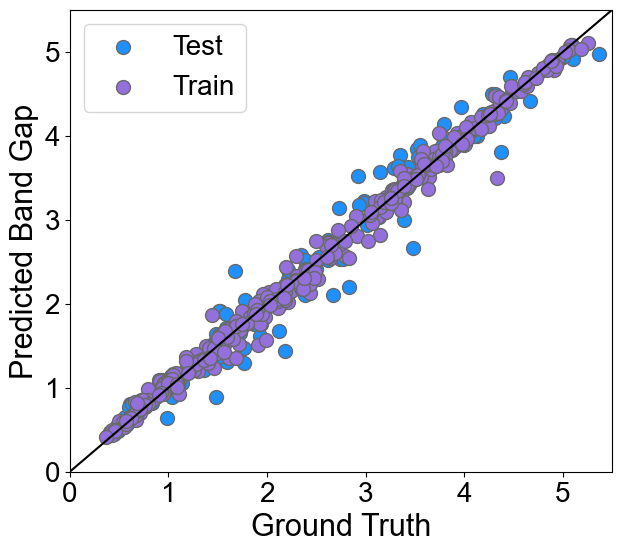

In [22]:
# Training Random Forest Regression Model for predicting Band Gap
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period'] + ['Decomp']
label = ['Gap']
X = pbe_data[features]
y = pbe_data[label]

X_true_train, X_true_test, y_true_train_gap, y_true_test_gap = train_test_split(X, y, test_size=0.30, random_state=42)

param_grid = {}

rfr_gap = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfr_gap.fit(X_true_train, y_true_train_gap)
Pred_train = rfr_gap.predict(X_true_train)
Pred_test = rfr_gap.predict(X_true_test)

Pred_gap_train = np.array(Pred_train, dtype="float32")
Pred_gap_test = np.array(Pred_test, dtype="float32")

rmse_test_gap = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test_gap, Pred_gap_test) )
rmse_train_gap = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train_gap, Pred_gap_train) )

print("Test/Train RMSE for Band Gap:", rmse_test_gap, rmse_train_gap)
fig = plt.figure( figsize=(7,6) )
plt.ylabel("Predicted Band Gap", fontsize=22, fontname = "Arial")
plt.xlabel("Ground Truth", fontsize=22, fontname = "Arial")
plt.yticks(fontsize=20, fontname = "Arial")
plt.xticks(fontsize=20, fontname = "Arial")
plt.scatter(y_true_test_gap, Pred_gap_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
plt.scatter(y_true_train_gap, Pred_gap_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
plt.plot( [0,5.5],[0,5.5], c="black")
plt.legend(["Test", "Train"], prop={'size':20, 'family':'Arial'})
plt.xlim([0, 5.5])
plt.ylim([0, 5.5])
plt.show()

Test/Train RMSE for SLME: 1.4175098281836536 0.6433536539316446


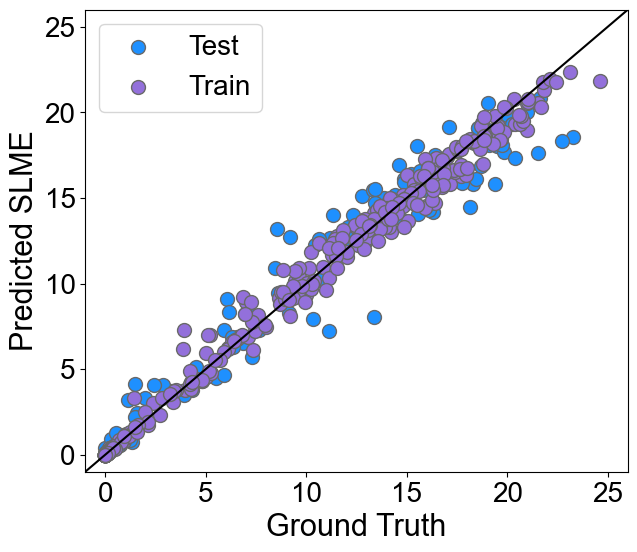

In [23]:
# Training Random Forest Regression Model for predicting SLME
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']  + ["Decomp"] + ["Gap"]
label = ['SLME']
X = pbe_data[features]
y = pbe_data[label]

X_true_train, X_true_test, y_true_train_slme, y_true_test_slme = train_test_split(X, y, test_size=0.30, random_state=42)

param_grid = {}

rfr_slme = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
rfr_slme.fit(X_true_train, y_true_train_slme)
Pred_train = rfr_slme.predict(X_true_train)
Pred_test = rfr_slme.predict(X_true_test)

Pred_slme_train = np.array(Pred_train, dtype="float32")
Pred_slme_test = np.array(Pred_test, dtype="float32")

rmse_test_slme = np.sqrt( sklearn.metrics.mean_squared_error(y_true_test_slme, Pred_slme_test) )
rmse_train_slme = np.sqrt( sklearn.metrics.mean_squared_error(y_true_train_slme, Pred_slme_train) )

print("Test/Train RMSE for SLME:", rmse_test_slme, rmse_train_slme)
fig = plt.figure( figsize=(7,6) )
plt.scatter(y_true_test_slme, Pred_slme_test, s = 100, c="dodgerblue", edgecolors='dimgrey')
plt.scatter(y_true_train_slme, Pred_slme_train, s = 100, c="mediumpurple", edgecolors='dimgrey')
plt.plot( [-1, 26],[-1,26], c="black")
plt.ylabel("Predicted SLME", fontsize=22, fontname = "Arial")
plt.xlabel("Ground Truth", fontsize=22, fontname = "Arial")
plt.yticks(fontsize=20, fontname = "Arial")
plt.xticks(fontsize=20, fontname = "Arial")
plt.xlim([-1, 26])
plt.ylim([-1, 26])
plt.legend(["Test", "Train"], prop={'size':20, 'family':'Arial'})
plt.show()

Generating Novel HaPs using WGAN

In [26]:
from WGAN_model import WGAN
model = WGAN(15, 54)
gen = model.train_wgan(pbe_data[['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl', 'Br', 'I', 'Phase']], "model.h5") #Training a new model on the PBE dataset
comp_vector = model.gen_novel_comps(pbe_data[['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl', 'Br', 'I', 'Phase']]) #Generating novel compositions with calculated elemental properties vector using the pre-trained model
comp_vector = pd.read_csv("PBE_WGAN_Generated_Compositions.csv")
comp_vector

,K,Rb,Cs,MA,FA,Ca,Sr,Ba,Ge,Sn,...,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period,Decomp,Gap,SLME
0,0.057915,0.223095,0.201911,0.110996,0.406083,0.008698,0.147396,0.361280,0.352821,0.118134,...,317.559058,1109.931936,5.864920,16.404623,2.871084,38.158955,4.175497,0.064446,2.884373,3.480213
1,0.029369,0.103728,0.115730,0.334465,0.416709,0.031153,0.000245,0.169548,0.506577,0.237393,...,325.989717,1145.672411,5.184530,14.601537,2.960673,33.575988,3.920888,-0.200707,1.695764,13.257727
2,0.051005,0.350710,0.148204,0.004110,0.445970,0.101048,0.105577,0.126708,0.431111,0.214614,...,305.702108,1057.396781,6.861163,18.766506,2.760215,45.966147,4.609230,0.070260,1.790602,14.420324
3,0.069770,0.262425,0.061624,0.070984,0.535197,0.046978,0.020857,0.258383,0.463748,0.170339,...,318.186911,1112.177223,5.821467,16.238418,2.880532,38.067489,4.170416,0.002298,2.039879,10.795383
4,0.076057,0.418211,0.093850,0.209424,0.202458,0.115751,0.073471,0.115746,0.343483,0.329628,...,322.962623,1132.933732,5.427196,15.256173,2.927877,35.165007,4.009167,-0.135996,1.926982,10.785830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.057941,0.132929,0.144286,0.142076,0.522768,0.041338,0.049413,0.025385,0.460428,0.209968,...,337.078645,1195.912093,4.233622,12.477546,3.056978,25.610035,3.478335,-0.208847,1.945854,11.286628
99996,0.012837,0.093611,0.117967,0.225046,0.550539,0.054920,0.064951,0.129598,0.391807,0.193806,...,298.140986,1023.917450,7.496079,20.274362,2.689366,50.931503,4.885084,0.026231,1.499001,17.060843
99997,0.111498,0.135672,0.144905,0.163385,0.444541,0.051439,0.067013,0.350392,0.352214,0.009582,...,327.801509,1153.289841,5.039410,14.209186,2.980349,32.629114,3.868284,-0.015346,3.289217,0.968628
99998,0.122891,0.109998,0.104050,0.156527,0.506534,0.053699,0.074637,0.192545,0.369975,0.126192,...,318.736644,1114.118060,5.783856,16.090971,2.888971,38.002451,4.166803,0.036495,1.752545,12.192012


In [27]:
#Property Prediction for Novel Compositions using RFR Models
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
X1 = comp_vector[features]

predictions = rfr_decomp.predict(X1)
comp_vector["Decomp"] = np.array(predictions, dtype="float32")

X1 = comp_vector[features + ["Decomp"]]
predictions = rfr_gap.predict(X1)
comp_vector["Gap"] = np.array(predictions, dtype="float32")

X1 = comp_vector[features + ["Decomp"] + ["Gap"]]
predictions = rfr_slme.predict(X1)
comp_vector["SLME"] = np.array(predictions, dtype="float32")

final_comps = comp_vector[comp_vector["Decomp"] < 0].copy()
print("Number of compositions with a negative decomposition energy are: ", len(final_comps))

final_comps = final_comps[final_comps["Gap"] < 2].copy()
final_comps = final_comps[ final_comps["SLME"] > 14.99 ].copy()
print("Number of compositions with all properties in desired range are: ", len(final_comps))

Number of compositions with a negative decomposition energy are:  64297
Number of compositions with all properties in desired range are:  13085


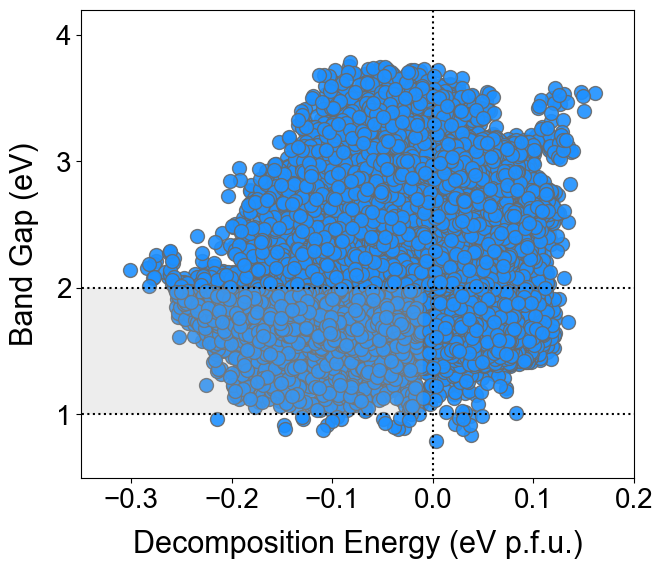

In [28]:
#Plotting the 100,000 generated HaPs with predicted properties
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
plt.scatter(comp_vector.Decomp[0:100000], comp_vector.Gap[0:100000], c='dodgerblue', marker='o', s=100, edgecolors='dimgrey', alpha=0.9)

a = [1,1,1]
b = [-1000,0,1000]
c = [0,0,0]
d = [2,2,2]
plt.plot(b, a, c='k', ls=':')
plt.plot(b, d, c='k', ls=':')
plt.plot(c, b, c='k', ls=':')
x1 = np.arange(-1000, c[0],  0.01)

plt.fill_between(x1, a[0], d[0], facecolor='darkgrey', alpha=0.2)

plt.xlim([-0.35, 0.2])
plt.ylim([0.5, 4.2])
plt.xticks([-0.3, -0.2, -0.1, 0.0, 0.1, 0.2], fontsize=20, fontname = "Arial")
plt.yticks([1.0, 2.0, 3.0, 4.0], fontsize=20, fontname = "Arial")
plt.xlabel('Decomposition Energy (eV p.f.u.)', fontsize=22, labelpad=12, fontname = "Arial")
plt.ylabel('Band Gap (eV)', fontsize=22, labelpad=12, fontname = "Arial")
plt.show()

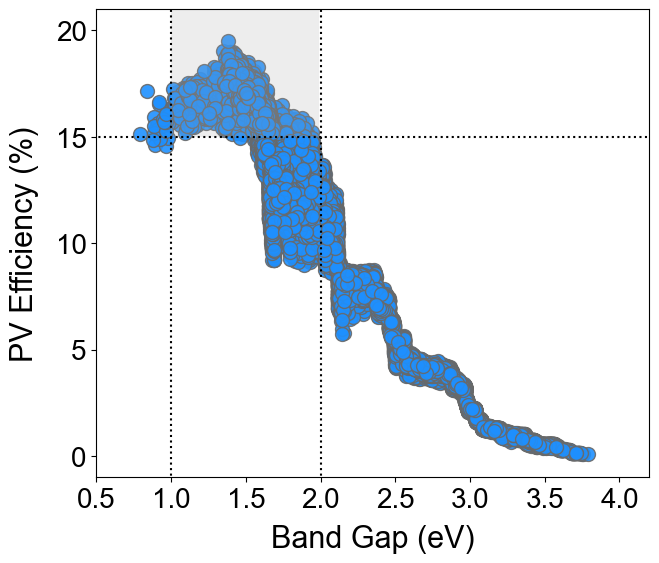

In [29]:
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
plt.scatter(comp_vector.Gap[0:100000], comp_vector.SLME[0:100000], c='dodgerblue', marker='o', s=100, edgecolors='dimgrey', alpha=0.9)
a = [1,1,1]
b = [-1000,0,1000]
d = [2,2,2]
c = [15,15,15]
plt.plot(a, b, c='k', ls=':')
plt.plot(d, b, c='k', ls=':')
plt.plot(b, c, c='k', ls=':')
x1 = np.arange(a[0], d[0],  0.01)

plt.fill_between(x1, c[0], 1000, facecolor='darkgrey', alpha=0.2)

plt.ylim([-1, 21])
plt.xlim([0.5, 4.2])
plt.yticks([0, 5, 10, 15, 20], fontsize=20, fontname = "Arial")
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], fontsize=20, fontname = "Arial")
plt.ylabel('PV Efficiency (%)', fontsize=22, labelpad=12, fontname = "Arial")
plt.xlabel('Band Gap (eV)', fontsize=22, labelpad=8, fontname = "Arial")
plt.show()

Mapping the Chemical Latent Space - tSNE Plots

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

comp_vector_tsne = comp_vector.copy()
for i in range(len(comp_vector_tsne)):
    if comp_vector_tsne.loc[i, "Decomp"] < 0:
        comp_vector_tsne.loc[i, "Decomp_Label"] = 1
        if comp_vector_tsne.loc[i, "Gap"] < 2:
            comp_vector_tsne.loc[i, "Gap_Label"] = 1
            if  comp_vector_tsne.loc[i, "SLME"] > 14.99:
                comp_vector_tsne.loc[i, "SLME_Label"] = 1
            else:
                comp_vector_tsne.loc[i, "SLME_Label"] = 0
        else:
            comp_vector_tsne.loc[i, "Gap_Label"] = 0
            comp_vector_tsne.loc[i, "SLME_Label"] = 0
    else:
        comp_vector_tsne.loc[i, "Decomp_Label"] = 0
        comp_vector_tsne.loc[i, "Gap_Label"] = 0
        comp_vector_tsne.loc[i, "SLME_Label"] = 0

#comp_vector_tsne.drop("Unnamed: 0", inplace=True, axis = 1)
comp_vector_tsne

,K,Rb,Cs,MA,FA,Ca,Sr,Ba,Ge,Sn,...,X_hov,X_En,X_at_num,X_period,Decomp,Gap,SLME,Decomp_Label,Gap_Label,SLME_Label
0,0.057915,0.223095,0.201911,0.110996,0.406083,0.008698,0.147396,0.361280,0.352821,0.118134,...,16.404623,2.871084,38.158955,4.175497,0.064446,2.884373,3.480213,0.0,0.0,0.0
1,0.029369,0.103728,0.115730,0.334465,0.416709,0.031153,0.000245,0.169548,0.506577,0.237393,...,14.601537,2.960673,33.575988,3.920888,-0.200707,1.695764,13.257727,1.0,1.0,0.0
2,0.051005,0.350710,0.148204,0.004110,0.445970,0.101048,0.105577,0.126708,0.431111,0.214614,...,18.766506,2.760215,45.966147,4.609230,0.070260,1.790602,14.420324,0.0,0.0,0.0
3,0.069770,0.262425,0.061624,0.070984,0.535197,0.046978,0.020857,0.258383,0.463748,0.170339,...,16.238418,2.880532,38.067489,4.170416,0.002298,2.039879,10.795383,0.0,0.0,0.0
4,0.076057,0.418211,0.093850,0.209424,0.202458,0.115751,0.073471,0.115746,0.343483,0.329628,...,15.256173,2.927877,35.165007,4.009167,-0.135996,1.926982,10.785830,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.057941,0.132929,0.144286,0.142076,0.522768,0.041338,0.049413,0.025385,0.460428,0.209968,...,12.477546,3.056978,25.610035,3.478335,-0.208847,1.945854,11.286628,1.0,1.0,0.0
99996,0.012837,0.093611,0.117967,0.225046,0.550539,0.054920,0.064951,0.129598,0.391807,0.193806,...,20.274362,2.689366,50.931503,4.885084,0.026231,1.499001,17.060843,0.0,0.0,0.0
99997,0.111498,0.135672,0.144905,0.163385,0.444541,0.051439,0.067013,0.350392,0.352214,0.009582,...,14.209186,2.980349,32.629114,3.868284,-0.015346,3.289217,0.968628,1.0,0.0,0.0
99998,0.122891,0.109998,0.104050,0.156527,0.506534,0.053699,0.074637,0.192545,0.369975,0.126192,...,16.090971,2.888971,38.002451,4.166803,0.036495,1.752545,12.192012,0.0,0.0,0.0


In [59]:
#Training the tSNE model
target_variable = comp_vector_tsne["Label"]
target_decomp = comp_vector_tsne["Decomp_Label"]
features_variable=comp_vector_tsne.drop(["Label", "Decomp", "SLME", "Gap", "Decomp_Label", 'index'],axis=1)

standarized_data = StandardScaler().fit_transform(features_variable)
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(standarized_data)

# Save the tsne_data to a file
import pickle
with open('tsne_data.pkl', 'wb') as file:
    pickle.dump(tsne_data, file)

print("t-SNE data saved successfully.")

t-SNE data saved successfully.


In [ ]:
target_gap = comp_vector_tsne["Gap_Label"]
target_decomp = comp_vector_tsne["Decomp_Label"]
target_slme = comp_vector_tsne["SLME_Label"]

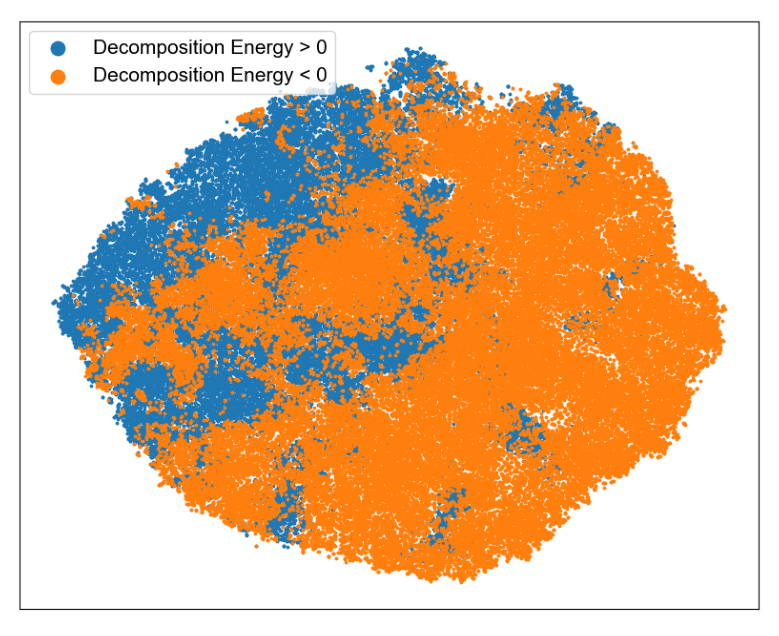

In [54]:
#Plot the tSNE data
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
 
for label in [0, 1]:

    indices = [i for i, l in enumerate(target_decomp) if l == label]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, label=label, s=3)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend(loc='best')
plt.legend(["Decomposition Energy > 0", "Decomposition Energy < 0"], loc = 'upper left', ncol=1, prop={'size':15, 'family': 'Arial'}, markerscale=6)
plt.show()

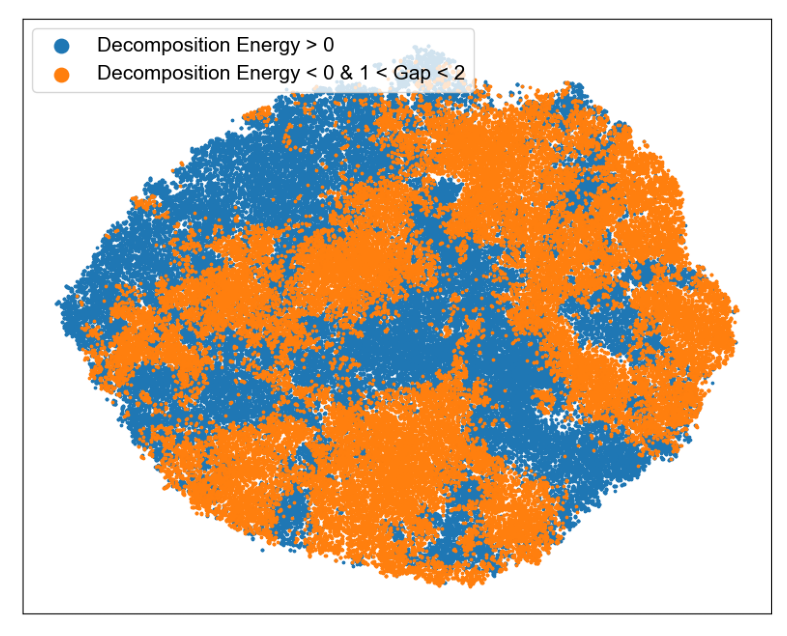

In [57]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
 
for label in [0, 1]:

    indices = [i for i, l in enumerate(target_gap) if l == label]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, label=label, s=3)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend(loc='best')
plt.legend(["Decomposition Energy > 0", "Decomposition Energy < 0 & 1 < Gap < 2"], loc = 'upper left', ncol=1, prop={'size':15, 'family': 'Arial'}, markerscale=6)
plt.show()

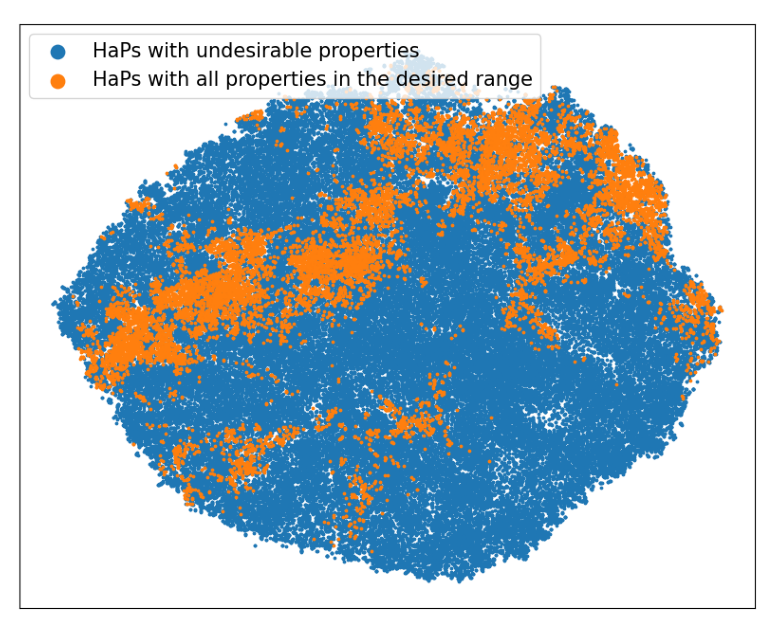

In [58]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
 
for label in [0, 1]:

    indices = [i for i, l in enumerate(target_slme) if l == label]
    current_tx = np.take(tx, indices)
    current_ty = np.take(ty, indices)
    ax.scatter(current_tx, current_ty, label=label, s=3)

ax.legend(loc = 'best')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.legend(["HaPs with undesirable properties", "HaPs with all properties in the desired range"], loc = 'upper left', ncol=1, prop={'size':15}, markerscale=6)
plt.show()

Conditional Generation of New HaPs

In [33]:
opt_comps = comp_vector[comp_vector["Decomp"] < 0].copy()
opt_comps = opt_comps[opt_comps["Gap"] < 2].copy()
opt_comps = opt_comps[ opt_comps["SLME"] > 14.99 ].copy()
opt_comps

,K,Rb,Cs,MA,FA,Ca,Sr,Ba,Ge,Sn,...,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period,Decomp,Gap,SLME
8,0.058800,0.132095,0.184548,0.187749,0.436808,0.007535,0.082097,0.189802,0.314441,0.218009,...,312.348693,1087.066004,6.298893,17.459376,2.820898,41.457783,4.358766,-0.012433,1.601244,16.239960
9,0.074721,0.356674,0.338308,0.091359,0.138939,0.122728,0.016970,0.069273,0.295582,0.211520,...,331.447618,1169.621666,4.729992,13.496445,3.013263,30.122236,3.729013,-0.146051,1.636568,15.454784
12,0.028390,0.142692,0.090285,0.225751,0.512882,0.054515,0.051804,0.188543,0.456699,0.173516,...,312.387732,1085.562519,6.324672,17.323071,2.832439,42.437952,4.413220,-0.059088,1.636259,15.973621
24,0.132015,0.247104,0.144916,0.195439,0.280526,0.006057,0.069972,0.213465,0.463180,0.240713,...,317.557457,1110.162387,5.860937,16.423153,2.869485,38.017482,4.167638,-0.034644,1.566081,16.104578
27,0.072508,0.264136,0.164551,0.045133,0.453671,0.041791,0.008254,0.165414,0.549539,0.202505,...,317.087906,1107.148793,5.916564,16.445147,2.871316,38.886537,4.215919,-0.039179,1.566222,16.475561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,0.127250,0.167273,0.011076,0.180944,0.513458,0.011263,0.103502,0.059187,0.459081,0.176066,...,310.109420,1076.085138,6.505401,17.824228,2.807021,43.567758,4.475987,-0.001817,1.585213,16.102875
99951,0.079299,0.345258,0.342334,0.225390,0.007718,0.035382,0.095441,0.121583,0.326446,0.262015,...,312.963585,1088.397364,6.271375,17.230088,2.835935,41.888751,4.382708,-0.049183,1.514784,16.891330
99952,0.013641,0.181704,0.239346,0.087152,0.478157,0.044651,0.071717,0.033033,0.515729,0.134061,...,324.593476,1139.478389,5.301977,14.879081,2.947668,34.499919,3.972218,-0.099426,1.633581,15.997407
99967,0.098833,0.237874,0.098294,0.122530,0.442470,0.028054,0.001679,0.154564,0.546000,0.236412,...,320.789733,1123.885390,5.599727,15.733413,2.903698,36.248231,4.069346,-0.053222,1.587009,15.619109


In [39]:
from WGAN_model import WGAN
model = WGAN(15, 54)
gen = model.train_wgan(opt_comps[['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl', 'Br', 'I', 'Phase']], "model.h5") #Training a new model on the PBE dataset
gen_vector = model.gen_novel_comps(opt_comps[['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl', 'Br', 'I', 'Phase']]) #Generating novel compositions with calculated elemental properties vector using the pre-trained model
gen_vector

,K,Rb,Cs,MA,FA,Ca,Sr,Ba,Ge,Sn,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,0.026163,0.278441,0.101763,0.205656,0.387976,0.077566,0.057231,0.070872,0.441657,0.212698,...,305.813086,3.985222,93.989771,315.254129,1098.849370,6.073665,16.797063,2.855331,40.198638,4.288813
1,0.018669,0.278884,0.033324,0.312001,0.357122,0.072256,0.044343,0.194823,0.409339,0.115534,...,301.027175,3.934642,92.017146,316.450462,1104.117746,5.973706,16.556280,2.866733,39.430278,4.246127
2,0.135293,0.300400,0.210288,0.027170,0.326849,0.082775,0.025049,0.086147,0.300525,0.389586,...,301.654428,3.933623,92.315608,316.290101,1103.381143,5.987631,16.586219,2.865407,39.551513,4.252862
3,0.047769,0.451714,0.175282,0.047137,0.278098,0.084054,0.064502,0.020911,0.329544,0.339742,...,268.951859,3.664651,78.436377,324.500393,1139.842200,5.296345,14.957141,2.941623,34.095470,3.949748
4,0.020758,0.510319,0.184939,0.110810,0.173174,0.087009,0.075304,0.008459,0.237306,0.512350,...,292.581578,3.869598,88.409702,318.572840,1113.560521,5.794702,16.136497,2.886318,38.009365,4.167187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.069764,0.350397,0.169786,0.133827,0.276227,0.106610,0.044414,0.048526,0.369725,0.382241,...,294.708396,3.865249,89.426356,318.028755,1111.057789,5.842013,16.237824,2.881844,38.422837,4.190158
49996,0.035327,0.300427,0.084031,0.280584,0.299631,0.089639,0.008411,0.142465,0.396363,0.247815,...,294.457606,3.916129,89.043550,318.116284,1111.656175,5.831009,16.236531,2.881259,38.238863,4.179937
49997,0.018688,0.396343,0.145482,0.191323,0.248164,0.112730,0.026919,0.134601,0.312158,0.270671,...,298.495770,3.913221,90.945935,317.085708,1106.936435,5.920261,16.430051,2.872646,39.009556,4.222753
49998,0.036553,0.471440,0.201459,0.072293,0.218254,0.138763,0.022347,0.023577,0.267512,0.444487,...,242.838727,3.469497,67.251336,331.065397,1169.074451,4.742237,13.660466,3.002047,29.686124,3.704785


In [40]:
#Property Prediction for Novel Compositions using RFR Models
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
X1 = gen_vector[features]

predictions = rfr_decomp.predict(X1)
gen_vector["Decomp"] = np.array(predictions, dtype="float32")

X1 = gen_vector[features + ["Decomp"]]
predictions = rfr_gap.predict(X1)
gen_vector["Gap"] = np.array(predictions, dtype="float32")

X1 = gen_vector[features + ["Decomp", 'Gap']]
predictions = rfr_slme.predict(X1)
gen_vector["SLME"] = np.array(predictions, dtype="float32")


final_comps = gen_vector[gen_vector["Decomp"] < 0].copy()
print("Number of compositions with a negative decomposition energy are: ", len(final_comps))

final_comps = final_comps[final_comps["Gap"] < 2].copy()
final_comps = final_comps[ final_comps["SLME"] > 14.99 ].copy()
print("Number of compositions with all properties in desired range are: ", len(final_comps))

Number of compositions with a negative decomposition energy are:  49513
Number of compositions with all properties in desired range are:  38931


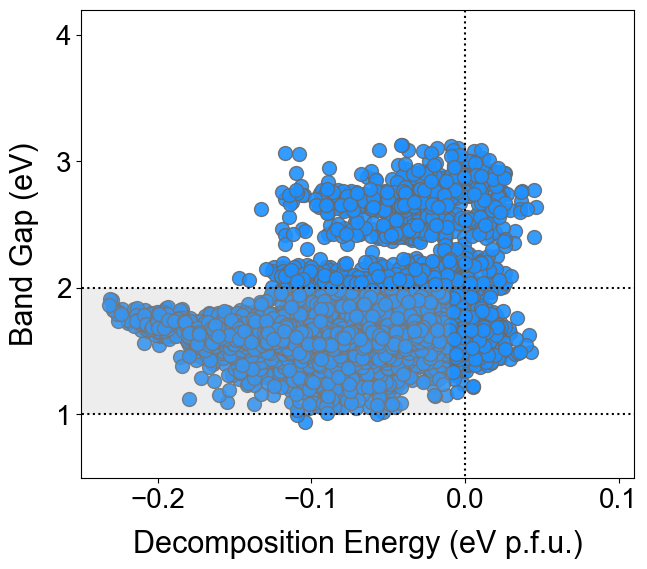

In [41]:
#Loading the 100,000 generated HaPs with predicted properties
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
plt.scatter(gen_vector.Decomp[0:len(gen_vector)], gen_vector.Gap[0:len(gen_vector)], c='dodgerblue', marker='o', s=100, edgecolors='dimgrey', alpha=0.9)

a = [1,1,1]
b = [-1000,0,1000]
c = [0,0,0]
d = [2,2,2]
plt.plot(b, a, c='k', ls=':')
plt.plot(b, d, c='k', ls=':')
plt.plot(c, b, c='k', ls=':')
x1 = np.arange(-1000, c[0],  0.01)

plt.fill_between(x1, a[0], d[0], facecolor='darkgrey', alpha=0.2)

plt.xlim([-0.25, 0.11])
plt.ylim([0.5, 4.2])
plt.xticks([-0.2, -0.1, 0.0, 0.1], fontsize=20, fontname = "Arial")
plt.yticks([1.0, 2.0, 3.0, 4.0], fontsize=20, fontname = "Arial")
plt.xlabel('Decomposition Energy (eV p.f.u.)', fontsize=22, labelpad=12, fontname = "Arial")
plt.ylabel('Band Gap (eV)', fontsize=22, labelpad=12, fontname = "Arial")
plt.show()

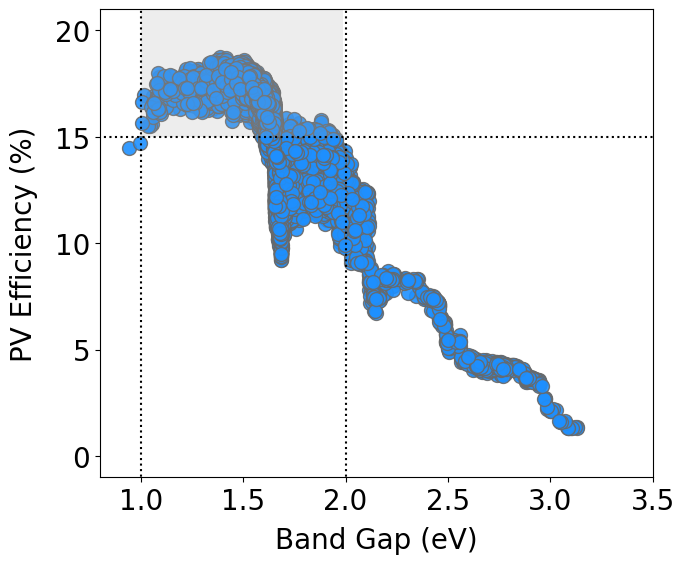

In [42]:
fig = plt.figure( figsize=(7,6) )
plt.subplots_adjust(left=0.18, bottom=0.18, right=0.97, top=0.96)
plt.scatter(gen_vector.Gap[0:len(gen_vector)], gen_vector.SLME[0:len(gen_vector)], c='dodgerblue', marker='o', s=100, edgecolors='dimgrey', alpha=0.9)
a = [1,1,1]
b = [-1000,0,1000]
d = [2,2,2]
c = [15,15,15]
plt.plot(a, b, c='k', ls=':')
plt.plot(d, b, c='k', ls=':')
plt.plot(b, c, c='k', ls=':')
x1 = np.arange(a[0], d[0],  0.01)

plt.fill_between(x1, c[0], 1000, facecolor='darkgrey', alpha=0.2)

plt.ylim([-1, 21])
plt.xlim([0.8, 3.5])
plt.yticks([0, 5, 10, 15, 20], fontsize=20)
plt.xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], fontsize=20)
plt.ylabel('PV Efficiency (%)', fontsize=20, labelpad=12)
plt.xlabel('Band Gap (eV)', fontsize=20, labelpad=8)
plt.show()

Generating Lead Free HaPs

In [43]:
pb_free_data = pbe_data.copy()
for i in range(len(pbe_data)):
    if pbe_data.loc[i, "Pb"] != 0:
        pb_free_data.drop(i, axis=0, inplace=True)
pb_free_data.reset_index(inplace=True)
pb_free_data.drop(['index', 'Pb'], axis=1, inplace=True)
pb_free_data

,Formula,Decomp,Gap,SLME,Phase,K,Rb,Cs,MA,FA,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,CsBa_0.125Ge_0.875I_3,0.108798,1.0359,22.719,1,0.0,0.0,1.0,0.0,0.0,...,387,4.93,127.0,295,1010,7.76,20.9,2.66,53.0,5.00
1,CsBa_0.875Sn_0.125Cl_3,0.279044,3.5840,0.028,1,0.0,0.0,1.0,0.0,0.0,...,172,3.21,35.5,349,1250,3.21,10.2,3.16,17.0,3.00
2,CsBaBr_1.125Cl_1.875,0.310006,4.1875,0.000,1,0.0,0.0,1.0,0.0,0.0,...,207,3.18,52.1,340,1210,3.99,11.9,3.08,23.8,3.38
3,CsBaBr_3,0.271454,3.9969,0.001,1,0.0,0.0,1.0,0.0,0.0,...,266,3.12,79.9,325,1140,5.29,14.7,2.96,35.0,4.00
4,CsBaCl_3,0.346438,4.6677,0.000,1,0.0,0.0,1.0,0.0,0.0,...,172,3.21,35.5,349,1250,3.21,10.2,3.16,17.0,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,RbSrBr_1.5Cl_1.5,0.177850,4.0898,0.000,1,0.0,1.0,0.0,0.0,0.0,...,219,3.17,57.7,337,1200,4.25,12.5,3.06,26.0,3.50
364,RbSrBr_3,0.192420,3.8789,0.010,1,0.0,1.0,0.0,0.0,0.0,...,266,3.12,79.9,325,1140,5.29,14.7,2.96,35.0,4.00
365,RbSrCl_3,0.171397,4.6052,0.000,1,0.0,1.0,0.0,0.0,0.0,...,172,3.21,35.5,349,1250,3.21,10.2,3.16,17.0,3.00
366,RbSrI_2.625Br_0.375,0.250051,3.2687,0.317,1,0.0,1.0,0.0,0.0,0.0,...,372,4.70,121.0,299,1020,7.45,20.1,2.70,50.8,4.88


In [46]:
from WGAN_model import WGAN
model = WGAN(15, 54)
gen = model.train_wgan(pb_free_data[['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn','Cl', 'Br', 'I', 'Phase']], "model.h5") #Training a new model on the PBE dataset
gen_vector = model.gen_novel_comps(pb_free_data[['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn','Cl', 'Br', 'I', 'Phase']]) #Generating novel compositions with calculated elemental properties vector using the pre-trained model
gen_vector

,K,Rb,Cs,MA,FA,Ca,Sr,Ba,Ge,Sn,...,X_MP,X_dens,X_at_wt,X_EA,X_IE,X_hof,X_hov,X_En,X_at_num,X_period
0,0.049422,0.282862,0.369109,0.015207,0.283400,0.050899,0.245235,0.084505,0.494273,0.125088,...,238.443734,3.584293,64.598117,332.238843,1174.883412,4.633074,13.473464,3.008954,28.547640,3.641536
1,0.061866,0.252579,0.396079,0.009821,0.279654,0.232719,0.306868,0.100722,0.357963,0.001727,...,261.706145,3.671660,75.013566,326.350360,1148.321525,5.136007,14.610286,2.957037,32.707804,3.872656
2,0.089956,0.254654,0.271893,0.174383,0.209114,0.247307,0.276853,0.121696,0.140527,0.213618,...,288.964755,3.865121,86.742777,319.492606,1117.745189,5.715526,15.961671,2.894189,37.338098,4.129894
3,0.024565,0.194820,0.393590,0.169601,0.217424,0.122885,0.406473,0.091652,0.349366,0.029624,...,260.868584,3.633306,74.822349,326.546037,1149.065891,5.121691,14.561906,2.959684,32.652538,3.869585
4,0.057854,0.255020,0.356209,0.065536,0.265380,0.051496,0.320322,0.135850,0.463749,0.028583,...,268.728889,3.738695,77.945657,324.591556,1140.547577,5.283459,14.962087,2.940466,33.854566,3.936365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.001173,0.343438,0.292703,0.015086,0.347599,0.193433,0.297556,0.019302,0.462052,0.027657,...,247.261207,3.628653,68.487331,330.012069,1164.883001,4.822496,13.906749,2.989027,30.094337,3.727463
99996,0.009325,0.272688,0.333856,0.057671,0.326460,0.028538,0.253813,0.073936,0.524332,0.119382,...,237.980795,3.444703,65.110445,332.292058,1174.581974,4.637914,13.421676,3.013034,28.834931,3.657496
99997,0.023175,0.314396,0.298658,0.006839,0.356931,0.144306,0.209990,0.132702,0.412936,0.100066,...,264.318804,3.655486,76.318998,325.676966,1145.181883,5.195291,14.732468,2.951781,33.244803,3.902489
99998,0.086555,0.299699,0.216174,0.023371,0.374201,0.242398,0.238959,0.047039,0.257653,0.213951,...,279.782628,3.737449,83.118045,321.773658,1127.668569,5.527046,15.493230,2.916741,35.946174,4.052565


In [50]:
gen_vector['Pb'] = 0
features = ['K', 'Rb', 'Cs', 'MA', 'FA', 'Ca', 'Sr', 'Ba', 'Ge', 'Sn', 'Pb','Cl',
       'Br', 'I', 'Phase', 'A_ion_rad', 'A_BP', 'A_MP', 'A_dens', 'A_at_wt',
      'A_EA', 'A_IE', 'A_hof', 'A_hov', 'A_En', 'A_at_num', 'A_period', 'B_ion_rad',
      'B_BP', 'B_MP', 'B_dens', 'B_at_wt', 'B_EA', 'B_IE', 'B_hof', 'B_hov', 'B_En',
       'B_at_num', 'B_period', 'X_ion_rad', 'X_BP', 'X_MP', 'X_dens',
       'X_at_wt', 'X_EA', 'X_IE', 'X_hof', 'X_hov', 'X_En', 'X_at_num',
       'X_period']
X1 = gen_vector[features]

predictions = rfr_decomp.predict(X1)
gen_vector["Decomp"] = np.array(predictions, dtype="float32")

X1 = gen_vector[features + ["Decomp"]]
predictions = rfr_gap.predict(X1)
gen_vector["Gap"] = np.array(predictions, dtype="float32")

X1 = gen_vector[features + ["Decomp", 'Gap']]
predictions = rfr_slme.predict(X1)
gen_vector["SLME"] = np.array(predictions, dtype="float32")

final_comps = gen_vector[gen_vector["Decomp"] < 0].copy()
print("Number of Pb-free compositions with a negative decomposition energy are: ", len(final_comps))

final_comps = final_comps[final_comps["Gap"] < 2].copy()
final_comps = final_comps[ final_comps["SLME"] > 14.99 ].copy()
print("Number of Pb-free compositions with all properties in desired range are: ", len(final_comps))

Number of Pb-free compositions with a negative decomposition energy are:  95135
Number of Pb-free compositions with all properties in desired range are: 243
